Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset

In [ ]:
dataset = pd.read_csv('Facebook_Marketplace_data.csv')

In [ ]:
print(dataset.head(10))

   status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   
5          6       photo   4/18/2018 2:14            217             6   
6          7       video   4/18/2018 0:24            503           614   
7          8       video   4/17/2018 7:42            295           453   
8          9       photo   4/17/2018 3:33            203             1   
9         10       photo   4/11/2018 4:53            170             9   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0

Dropping redundant columns

In [ ]:
dataset.drop(columns=['Column1','Column2','Column3','Column4'],inplace=True)
print(dataset.columns)

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')


Checking for null values

In [ ]:
print(dataset.isnull().sum())

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


Relation between status_published and num_reactions

In [ ]:
dataset['status_published'] = pd.to_datetime(dataset['status_published'])
hour = dataset['status_published'].dt.hour
day = dataset['status_published'].dt.day_name()
reactions = dataset['num_reactions'].values

Visualising the effect of hour of the day on num_reactions

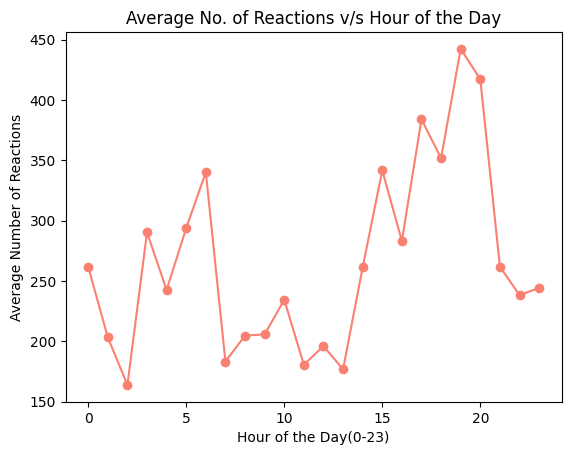

In [ ]:
dataset['hour'] = dataset['status_published'].dt.hour
avg_hour_reactions = dataset.groupby('hour')['num_reactions'].mean()
avg_hour_reactions.plot(color = 'salmon',marker='o')
plt.xlabel('Hour of the Day(0-23)')
plt.ylabel('Average Number of Reactions')
plt.title('Average No. of Reactions v/s Hour of the Day')
plt.show()

Visualising the effect of day of the week on reactions

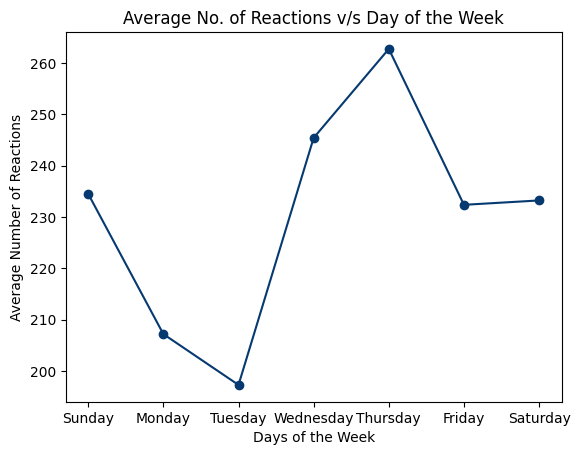

In [ ]:
dataset['day'] = dataset['status_published'].dt.day_name()
avg_day_reactions = dataset.groupby('day')['num_reactions'].mean()
day_order = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
avg_day_reactions = avg_day_reactions.reindex(day_order)
avg_day_reactions.plot(marker = 'o', color = '#063970')
plt.xlabel('Days of the Week')
plt.ylabel('Average Number of Reactions')
plt.title('Average No. of Reactions v/s Day of the Week')
plt.show()

Checking correlation between num_reactions, num_comments, and num_shares

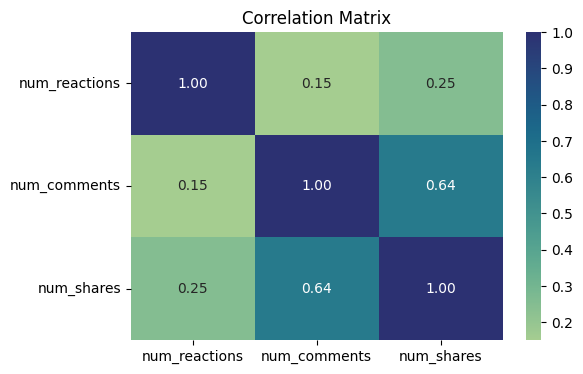

In [ ]:
import seaborn as sns
selected_dataset = dataset[['num_reactions','num_comments','num_shares']]
corr_matrix = selected_dataset.corr()
plt.figure(figsize = (6,4))
sns.heatmap(corr_matrix, annot = True, cmap = 'crest', fmt = '0.2f')
plt.title('Correlation Matrix')
plt.show()

K Means Clustering

In [ ]:
cols = ['status_type', 'num_reactions', 'num_comments', 'num_shares',
    'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
x = dataset[cols].copy()

Encoding categorical variables

In [ ]:
x = pd.get_dummies(x, columns = ['status_type'], dtype= int)
print(x.head(8))

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   
5            217             6           0        211          5         1   
6            503           614          72        418         70        10   
7            295           453          53        260         32         1   

   num_hahas  num_sads  num_angrys  status_type_link  status_type_photo  \
0          1         1           0                 0                  0   
1          0         0           0                 0                  1   
2          1         0           0                 0                  0 

Finding optimal value of k using elbow method

In [ ]:
wcss = []

In [ ]:
from sklearn.cluster import KMeans
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

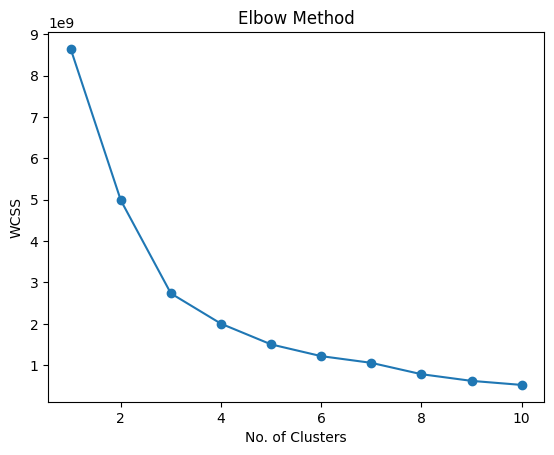

In [ ]:
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

Training K Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=1)

Count of different types of posts

In [ ]:
print(dataset['status_type'].value_counts())

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


Average value of num_reaction, num_comments, num_shares for each post type

In [ ]:
averages = dataset.groupby('status_type')[['num_reactions','num_comments','num_shares']].mean()
print(averages)

             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
